In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [92]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('sunroof-solar.csv')
df.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
0,20303,District of Columbia,38.876371,38.874446,-77.003766,-77.005605,38.875346,-77.004523,1037.00,0,33.333333,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-77.0045229333333 38.8753456)
1,21532,Maryland,39.722246,39.569701,-78.860691,-79.091712,39.651014,-78.930906,971.55,0,0.020812,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-78.9309058462436 39.6510141030593)
2,24069,Virginia,36.655148,36.541640,-79.509898,-79.702540,36.598786,-79.640503,1068.45,0,0.090253,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-79.6405031730145 36.5987864088448)
3,24724,West Virginia,37.359420,37.327022,-81.282143,-81.338330,37.331934,-81.314917,1028.50,0,62.500000,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-81.3149169875 37.331933825)
4,28357,North Carolina,34.961358,34.857796,-79.003998,-79.160387,34.916952,-79.081624,1095.65,0,0.086133,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-79.0816239424634 34.9169522628768)


In [93]:
df.shape

(11516, 32)

In [94]:
df.dtypes

region_name                               int64
state_name                               object
lat_max                                 float64
lat_min                                 float64
lng_max                                 float64
lng_min                                 float64
lat_avg                                 float64
lng_avg                                 float64
yearly_sunlight_kwh_kw_threshold_avg    float64
count_qualified                           int64
percent_covered                         float64
percent_qualified                       float64
number_of_panels_n                        int64
number_of_panels_s                        int64
number_of_panels_e                        int64
number_of_panels_w                        int64
number_of_panels_f                        int64
number_of_panels_median                 float64
number_of_panels_total                  float64
kw_median                               float64
kw_total                                

In [95]:
df.isnull().sum() 

region_name                              0
state_name                               0
lat_max                                  0
lat_min                                  0
lng_max                                  0
lng_min                                  0
lat_avg                                  0
lng_avg                                  0
yearly_sunlight_kwh_kw_threshold_avg     0
count_qualified                          0
percent_covered                          0
percent_qualified                        0
number_of_panels_n                       0
number_of_panels_s                       0
number_of_panels_e                       0
number_of_panels_w                       0
number_of_panels_f                       0
number_of_panels_median                 19
number_of_panels_total                  19
kw_median                               19
kw_total                                19
yearly_sunlight_kwh_n                    0
yearly_sunlight_kwh_s                    0
yearly_sunl

In [96]:
df.dropna(inplace=True)

In [97]:
df.shape

(11497, 32)

In [98]:
df.drop(['lat_max','lat_min','lng_max','lng_min'], axis=1, inplace = True)

In [99]:
df

,region_name,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
19,19149,Pennsylvania,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,POINT(-75.0657051746548 40.0374044403417)
20,74050,Oklahoma,36.077193,-96.067100,1097.35,7,100.000000,77.777778,0,34,27,75,20,11.0,156.0,2.75,39.00,0.000000e+00,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,"[[0,5],[5,1],[15,1]]",33.988079,0,POINT(-96.0671000555555 36.0771932333333)
21,19120,Pennsylvania,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,POINT(-75.120887243506 40.0343982932811)
22,19132,Pennsylvania,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,POINT(-75.169645159245 39.9956814907579)
23,19134,Pennsylvania,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,POINT(-75.1119347717865 39.9924510629131)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,18025,Pennsylvania,40.632179,-75.392770,980.05,5,100.000000,100.000000,0,0,0,0,9637,794.0,9637.0,198.50,2409.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,POINT(-75.39277012 40.6321787)
11512,91182,California,34.148964,-118.140715,1405.05,5,100.000000,83.333333,0,303,67,100,578,135.0,1048.0,33.75,262.00,0.000000e+00,1.212025e+05,2.327299e+04,3.420987e+04,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,POINT(-118.140715083333 34.148964)
11513,90261,California,33.896162,-118.377547,1405.05,5,100.000000,100.000000,53,329,165,242,1602,207.0,2391.0,51.75,597.75,1.841525e+04,1.295576e+05,6.040279e+04,9.014655e+04,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,POINT(-118.37754686 33.89616182)
11514,28281,North Carolina,35.226438,-80.845268,1091.40,5,100.000000,83.333333,6,21,20,49,1706,318.0,1802.0,79.50,450.50,1.585372e+03,6.776846e+03,5.439028e+03,1.563796e+04,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,POINT(-80.8452678 35.2264376833333)


In [48]:
states = df[['yearly_sunlight_kwh_total', 'state_name']]
states

,yearly_sunlight_kwh_total,state_name
19,4.901625e+07,Pennsylvania
20,5.024297e+04,Oklahoma
21,7.826531e+07,Pennsylvania
22,6.231354e+07,Pennsylvania
23,1.325080e+08,Pennsylvania
...,...,...
11511,2.719113e+06,Pennsylvania
11512,3.973936e+05,California
11513,8.674520e+05,California
11514,5.366249e+05,North Carolina


In [70]:
states.sort_values(by= ['yearly_sunlight_kwh_total'], ascending = False, inplace = True)
states.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,yearly_sunlight_kwh_total,state_name
8031,1.190968e+09,California
8419,1.049919e+09,Tennessee
8520,9.703672e+08,Texas
6124,8.755768e+08,Arizona
6666,8.393249e+08,Texas
10716,8.045181e+08,California
10426,7.981845e+08,Florida
9662,7.945344e+08,California
8029,7.787903e+08,California
9294,7.743694e+08,Florida


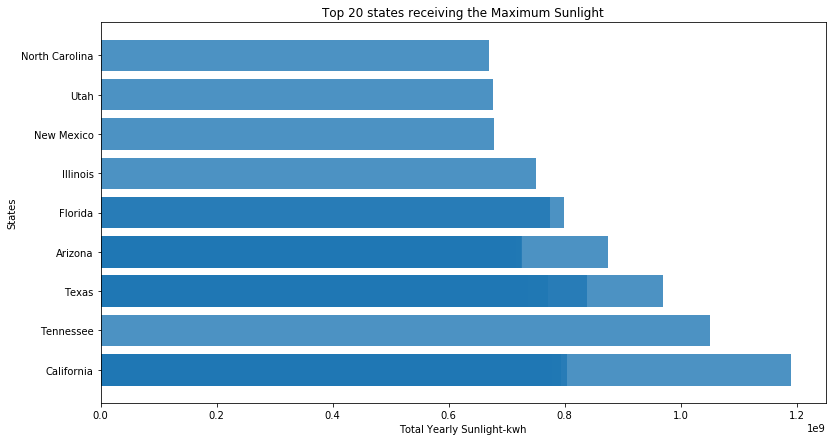

In [100]:
plt.figure(figsize=(13,7))
plt.barh(states.state_name.head(30),
         states.yearly_sunlight_kwh_total.head(30),
         align='center', alpha=0.8)
plt.xlabel('Total Yearly Sunlight-kwh')
plt.ylabel('States')
plt.title('Top 20 states receiving the Maximum Sunlight')

plt.show()